# Temperature By Countries

In [119]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from math import *

import time

plt.rcParams["figure.figsize"] = (16, 9)

## Cargo funciones.py

In [ ]:
# %load funciones.py
#Si se modifica funciones.py hay que descomentar el "# %load funciones.py" y cargar de nuevo la celda

def cml(fns, xs, ys):
    """Cuadrados minimos lineales"""
    A = np.array([fns(x) for x in xs], dtype=np.float64)
    ws = np.linalg.lstsq(A, ys)[0]
    return lambda x: sum([w*y for w, y in zip(ws, fns(x))])

def poly(grado):
    """Funcion polinomio"""
    return lambda x: [float(x)**i for i in range(grado, -1, -1)]

def ecm(xs, ys):
    """Error cuadratico medio"""
    if len(xs) != len(ys): raise Exception('Different size!')
    return sum([(x - y)**2 for x, y in zip(xs, ys)])/len(xs)

## Parseo datos

In [168]:
df = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')
#Me quedo con las que la temperatura no esta vacia
df = df[df.AverageTemperature.notnull()]

#Nombre columnas: dt, AverageTemperature, AverageTemperatureUncertainty, Country

#Parseo las fechas. Estas no pueden ser un timestamp porque tenemos que operar con ellas (son los x)
# Esta dividido por 10000 para que quede el año como la parte entera y los graficos tengan los ejes con él
df['dt']= df['dt'].apply(lambda x: float(x.translate({ord('-'): None}))/10000.0 )

groupByCountries = df.groupby('Country')

## Test con los datos de Argentina

3690234.95809


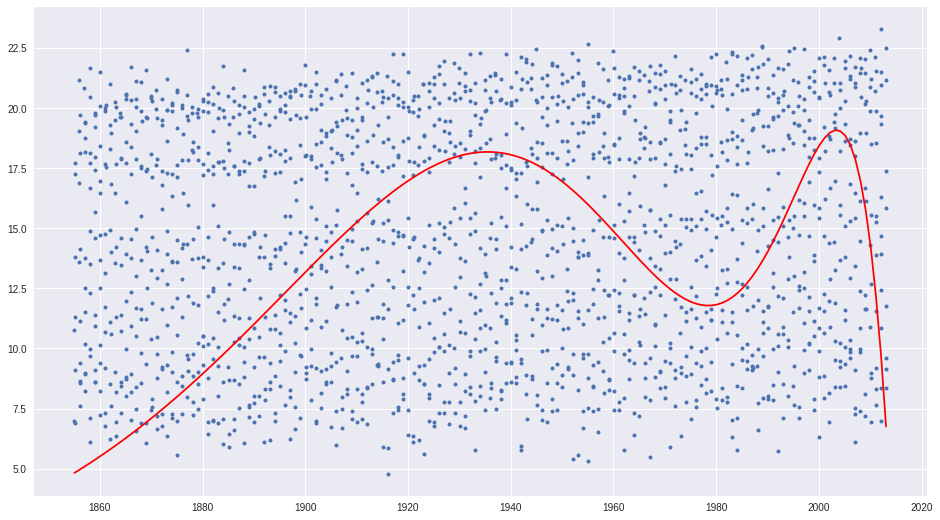

In [170]:
#Genero una especie de dataframe con los datos de argentina
gArg = groupByCountries.get_group('Argentina')
argFechas = list(gArg['dt'])
argTemp = list(gArg['AverageTemperature'])

func = cml(poly(93), argFechas, argTemp)
cmlY = [func(a) for a in argFechas]
print(ecm(argFechas, cmlY))

plt.plot(argFechas, argTemp, 'o', label='Temperatura', markersize=4)
plt.plot(argFechas, cmlY, 'r')
plt.show()